# Cleaning

In [15]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
import matplotlib.pyplot as plt

In [16]:
# Load the dataframe from a csv file
df_cf = pd.read_csv('Generated_CFs/cf_df_100_10_1.csv')

In [17]:
# Load the dataframe from a csv file
df = pd.read_csv('CensusAdultIncome.csv')

In [18]:
start_index = 1 + len(df)  # Calculate the starting index
new_index = range(start_index, start_index + len(df_cf))  # Create a new index starting from start_index
df_cf_reset = df_cf.copy()  # Create a copy of the DataFrame
df_cf_reset.index = new_index  # Set the new index
df_cf = df_cf_reset # Assign the new indexed DataFrame to the original DataFrame
df_cf.drop(columns=['Unnamed: 0'], inplace=True)  # Drop the 'Unnamed: 0' column

In [19]:
#Target value has values with dots, therefore 4 catagories
df['income'] = df['income'].str.replace('.', '')

# Replace the values in the target column with string '0' and '1'.
df['income'] = df['income'].str.replace('<=50K', '0')  
df['income'] = df['income'].str.replace('>50K', '1')   

# Convert to integer
df['income'] = df['income'].astype(int)

C:\Users\dideu\AppData\Local\Temp\ipykernel_21016\3457457334.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['income'] = df['income'].str.replace('.', '')


In [20]:
#Some values are like '?'. Replacing them as NaN 
df[df == '?'] = np.nan
# Dropping the rows with NaN values in  'workclass', 'occupation', 'native-country' for the test dataset
df.dropna(subset=['workclass', 'occupation', 'native-country'], inplace=True)
df.dropna( inplace=True)

In [21]:
df = df[0:1000]

# Graphs for features

In [22]:
def stacked_histogram(df_1, df_2, column_name):
    # Generate random colors
    num_colors = 2  # Number of colors needed (one for each DataFrame)
    colors = np.random.rand(num_colors, 3)  # Generate random RGB values
    
    # Grouping both DataFrames by 'marital-status' and counting the occurrences
    grouped_df_1 = df_1.groupby(column_name).size()
    grouped_df_2 = df_2.groupby(column_name).size()

    # Plotting the stacked histogram
    plt.figure(figsize=(10,5))
    p1 = plt.bar(grouped_df_1.index, grouped_df_1, color=colors[0], edgecolor='black')
    p2 = plt.bar(grouped_df_2.index, grouped_df_2, bottom=grouped_df_1, color= colors[1], edgecolor='black')
    plt.title('Stacked Distribution of {}'.format(column_name))
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)  # Rotate x-labels for better readability if needed
    plt.legend((p1[0], p2[0]), ('Original', 'Counterfactual'))
    plt.show()

In [23]:
def stacked_numerical_histogram(df1, df2, column_name):
    # Generate random colors
    num_colors = 2  # Number of colors needed (one for each DataFrame)
    colors = np.random.rand(num_colors, 3)  # Generate random RGB values
    
    plt.figure(figsize=(10,6))
    plt.hist([df1[column_name], df2[column_name]], bins=20,  color=colors, edgecolor='black', stacked=True)
    plt.title('Stacked Distribution of {}'.format(column_name))
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.legend(['Original', 'Counterfactual'])
    plt.show()

In [24]:
def stacked_cat_histogram(df_1, column_name):
    # Generate random colors
    num_colors = 2  # Number of colors needed (one for each DataFrame)
    colors = np.random.rand(num_colors, 3)  # Generate random RGB values
    
    # Grouping both DataFrames by 'marital-status' and counting the occurrences
    grouped_df_1 = df_1.groupby(column_name).size()
    #grouped_df_2 = df_2.groupby(column_name).size()

    # Plotting the stacked histogram
    plt.figure(figsize=(10,5))
    p1 = plt.bar(grouped_df_1.index, grouped_df_1, color=colors[0], edgecolor='black')
    #p2 = plt.bar(grouped_df_2.index, grouped_df_2, bottom=grouped_df_1, color= colors[1], edgecolor='black')
    plt.title('Stacked Distribution of {}'.format(column_name))
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)  # Rotate x-labels for better readability if needed
    plt.legend([p1[0]], ['Original'])
    plt.show()

# Results

In [25]:
df_cf.head()

,age,workclass,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income
48843,44,Local-gov,24982,10,Married-civ-spouse,Husband,White,Male,0,2077,40,0
48844,44,Local-gov,24982,10,Married-spouse-absent,Not-in-family,White,Male,0,0,40,0
48845,44,Local-gov,24982,10,Widowed,Husband,White,Male,0,0,8,0
48846,44,Local-gov,24982,10,Married-civ-spouse,Husband,White,Female,0,0,64,0
48847,44,Local-gov,24982,10,Never-married,Husband,White,Male,0,1160,40,0


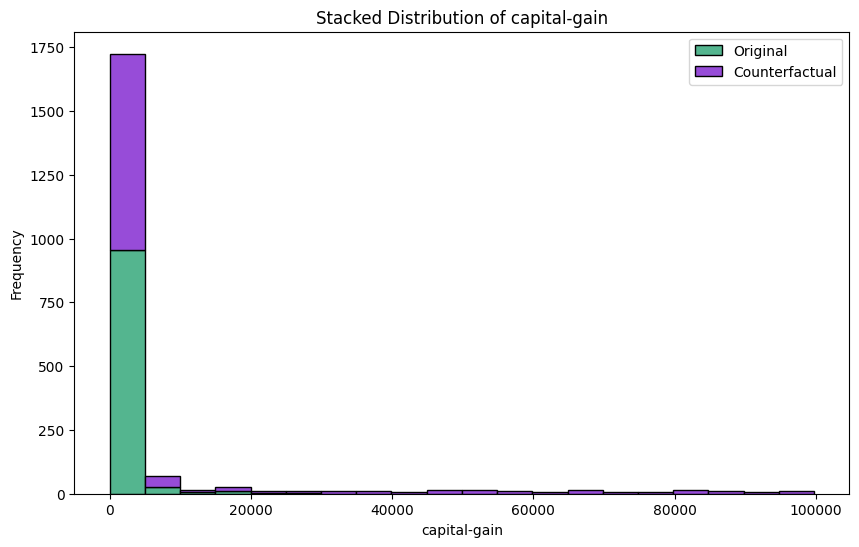

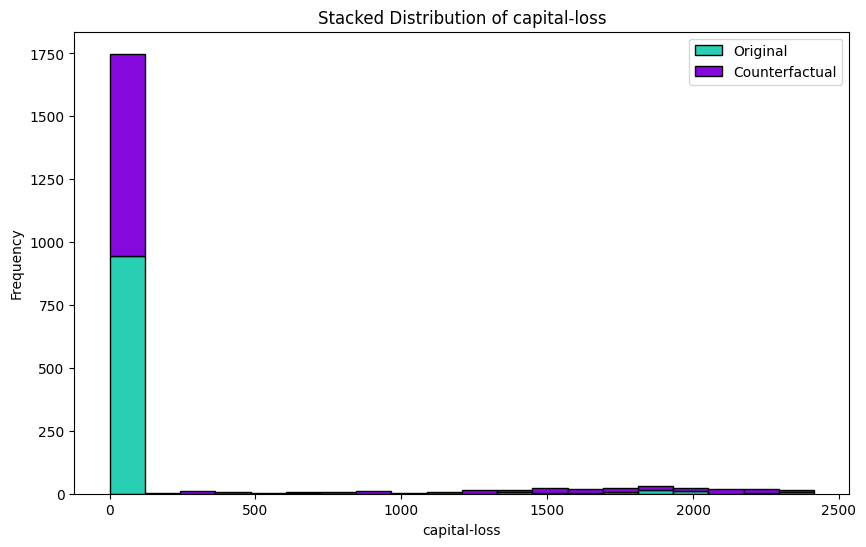

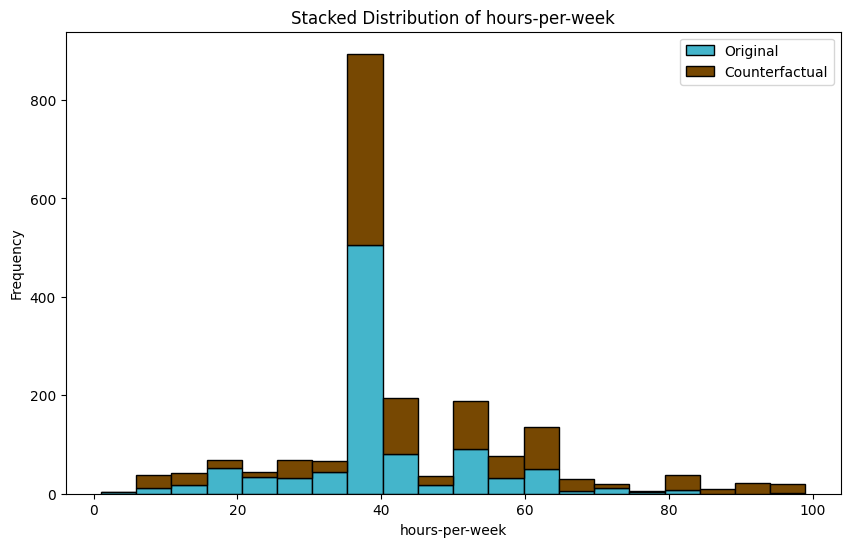

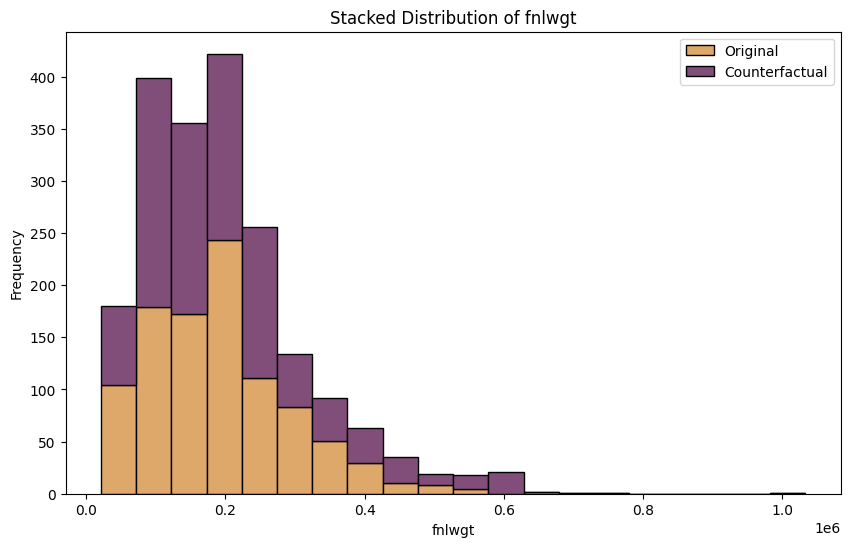

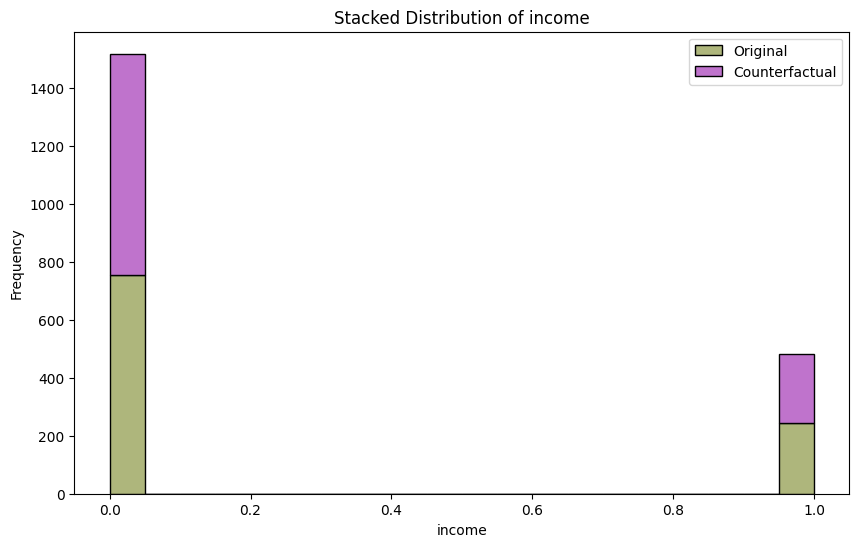

In [26]:
stacked_numerical_histogram(df, df_cf, 'capital-gain')
stacked_numerical_histogram(df, df_cf, 'capital-loss')
stacked_numerical_histogram(df, df_cf, 'hours-per-week')
stacked_numerical_histogram(df, df_cf, 'fnlwgt')

stacked_numerical_histogram(df, df_cf, 'income')


Old dice model

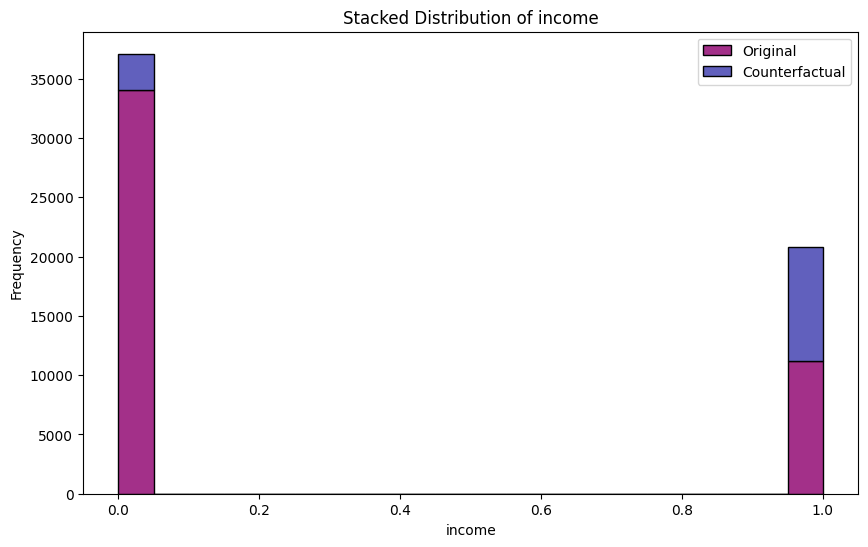

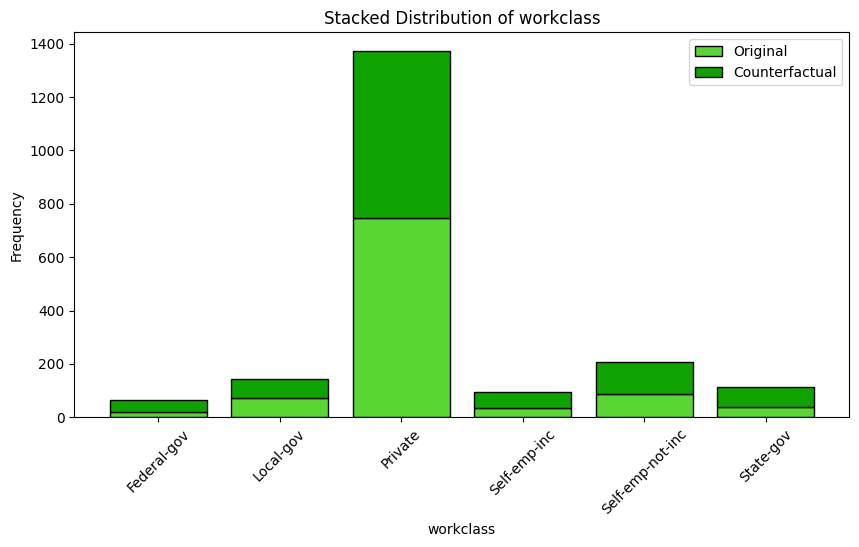

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (11,) and arg 3 with shape (16,).

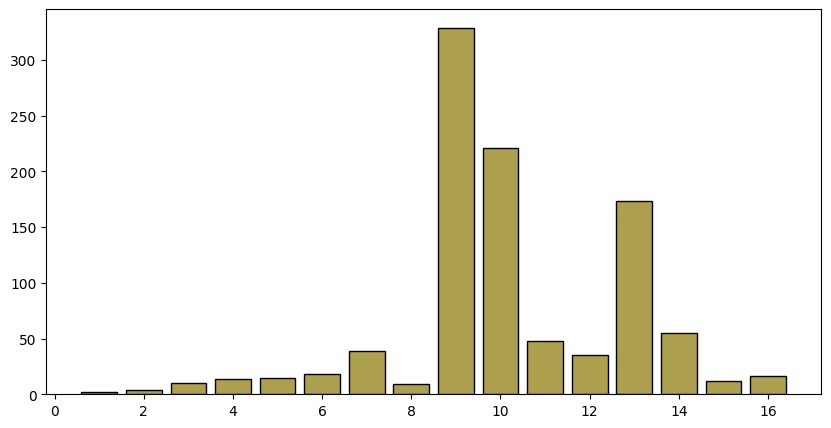

In [27]:
stacked_histogram(df, df_cf, 'workclass')
stacked_histogram(df, df_cf, 'education-num')
stacked_histogram(df, df_cf, 'marital-status')
stacked_histogram(df, df_cf, 'relationship')
stacked_histogram(df, df_cf, 'race')
stacked_histogram(df, df_cf, 'sex')


In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


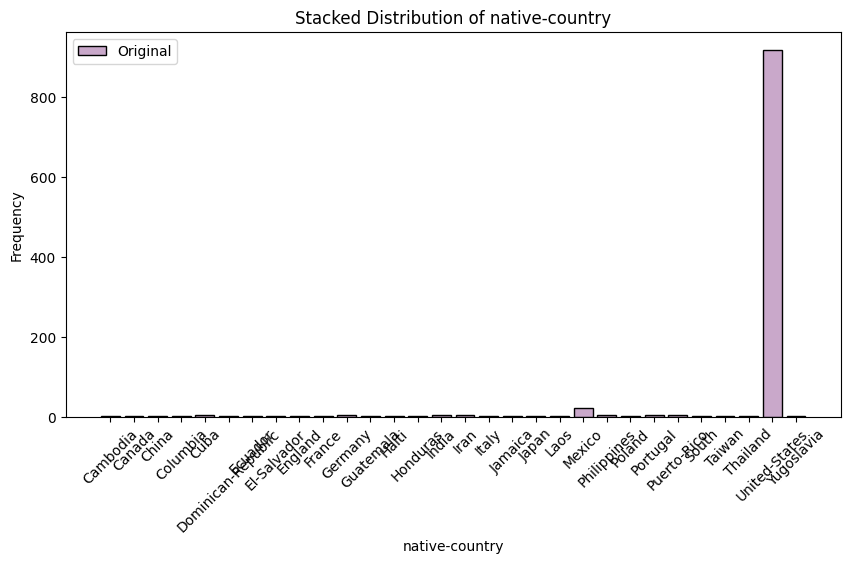

In [ ]:
stacked_cat_histogram(df, 'native-country')